# Testing test dataset for any trends, 
VADERS, Roberta from torch, and Pipeline with pretrained transformers and models

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

import nltk

In [97]:
#reading data, last four columns

df = pd.read_csv('data/test_new.csv', usecols = ['brand', 'review_title', 'review_text', 'review_rating'])
df = df.sample(n=1000)
df.shape

(1000, 4)

Text(0.5, 0, 'Review by numeric')

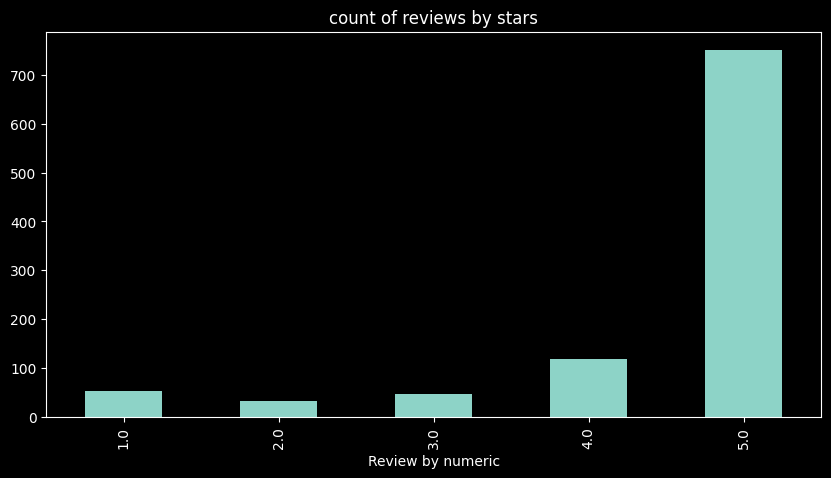

In [98]:
#quick eda

ax = df['review_rating'].value_counts().sort_index(). \
    plot(kind='bar',
         title='count of reviews by stars',
         figsize=(10,5))
ax.set_xlabel('Review by numeric')

In [99]:
#preprocessing:
df['review_text'] = df['review_text'].str.replace(r'[^\w\s]', '', regex=True)
df['review_text'] = df['review_text'].str.lower()
df['review_text'] = df['review_text'].str.strip()
df['review_text'] = df['review_text'].str.replace(r'\s+', ' ', regex=True)
df['review_text'] = df['review_text'].str.replace(r'\d+', '', regex=True)
df = df.map(str)

# nltk simple simulation start // test out example with tokenziation and premade models

In [105]:
example = df['review_text'][6563]
print(example)

tokens = nltk.word_tokenize(example)
print(tokens[10:])

its hard to beat tide pods for convenience ive never had any problems with them like some people have reported i throw a pod into the bottom of the washer put clothes in and push start on the machine clothes and my laundry room smell great clothes are clean and im happy very convenient
['had', 'any', 'problems', 'with', 'them', 'like', 'some', 'people', 'have', 'reported', 'i', 'throw', 'a', 'pod', 'into', 'the', 'bottom', 'of', 'the', 'washer', 'put', 'clothes', 'in', 'and', 'push', 'start', 'on', 'the', 'machine', 'clothes', 'and', 'my', 'laundry', 'room', 'smell', 'great', 'clothes', 'are', 'clean', 'and', 'im', 'happy', 'very', 'convenient']


In [106]:
tagged = nltk.pos_tag(tokens)
print(tagged)

[('its', 'PRP$'), ('hard', 'NN'), ('to', 'TO'), ('beat', 'VB'), ('tide', 'JJ'), ('pods', 'NNS'), ('for', 'IN'), ('convenience', 'NN'), ('ive', 'JJ'), ('never', 'RB'), ('had', 'VBD'), ('any', 'DT'), ('problems', 'NNS'), ('with', 'IN'), ('them', 'PRP'), ('like', 'IN'), ('some', 'DT'), ('people', 'NNS'), ('have', 'VBP'), ('reported', 'VBN'), ('i', 'JJ'), ('throw', 'VBP'), ('a', 'DT'), ('pod', 'NN'), ('into', 'IN'), ('the', 'DT'), ('bottom', 'NN'), ('of', 'IN'), ('the', 'DT'), ('washer', 'NN'), ('put', 'VBD'), ('clothes', 'NNS'), ('in', 'IN'), ('and', 'CC'), ('push', 'JJ'), ('start', 'NN'), ('on', 'IN'), ('the', 'DT'), ('machine', 'NN'), ('clothes', 'NNS'), ('and', 'CC'), ('my', 'PRP$'), ('laundry', 'JJ'), ('room', 'NN'), ('smell', 'NN'), ('great', 'JJ'), ('clothes', 'NNS'), ('are', 'VBP'), ('clean', 'JJ'), ('and', 'CC'), ('im', 'JJ'), ('happy', 'JJ'), ('very', 'RB'), ('convenient', 'JJ')]


In [107]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint

<bound method Tree.pprint of Tree('S', [('its', 'PRP$'), ('hard', 'NN'), ('to', 'TO'), ('beat', 'VB'), ('tide', 'JJ'), ('pods', 'NNS'), ('for', 'IN'), ('convenience', 'NN'), ('ive', 'JJ'), ('never', 'RB'), ('had', 'VBD'), ('any', 'DT'), ('problems', 'NNS'), ('with', 'IN'), ('them', 'PRP'), ('like', 'IN'), ('some', 'DT'), ('people', 'NNS'), ('have', 'VBP'), ('reported', 'VBN'), ('i', 'JJ'), ('throw', 'VBP'), ('a', 'DT'), ('pod', 'NN'), ('into', 'IN'), ('the', 'DT'), ('bottom', 'NN'), ('of', 'IN'), ('the', 'DT'), ('washer', 'NN'), ('put', 'VBD'), ('clothes', 'NNS'), ('in', 'IN'), ('and', 'CC'), ('push', 'JJ'), ('start', 'NN'), ('on', 'IN'), ('the', 'DT'), ('machine', 'NN'), ('clothes', 'NNS'), ('and', 'CC'), ('my', 'PRP$'), ('laundry', 'JJ'), ('room', 'NN'), ('smell', 'NN'), ('great', 'JJ'), ('clothes', 'NNS'), ('are', 'VBP'), ('clean', 'JJ'), ('and', 'CC'), ('im', 'JJ'), ('happy', 'JJ'), ('very', 'RB'), ('convenient', 'JJ')])>

In [108]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
#progress bar

sia = SentimentIntensityAnalyzer()

print(example)
sia.polarity_scores(example)

its hard to beat tide pods for convenience ive never had any problems with them like some people have reported i throw a pod into the bottom of the washer put clothes in and push start on the machine clothes and my laundry room smell great clothes are clean and im happy very convenient


{'neg': 0.022, 'neu': 0.734, 'pos': 0.244, 'compound': 0.9307}

In [109]:
res = {}
res_numeric = {}
for i, row in tqdm(df.iterrows(), total=len(df)): 
    text = row['review_text']
    category = row['brand'] 
    res[category] = sia.polarity_scores(text)
    res_numeric[i+1] = sia.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [110]:
vaders_res = pd.DataFrame(res).T
vaders = pd.DataFrame(res_numeric).T
vaders = vaders.reset_index().rename(columns={'index': 'id'})
vaders = vaders.iloc[:, :5]
vaders = pd.concat([df, vaders], axis=1)

In [111]:
#new dataset with sentimental columns added
vaders.head()

,brand,review_title,review_text,review_rating,id,neg,neu,pos,compound
8059,Swiffer,Five Stars,does the job for me,5.0,NaN,NaN,NaN,NaN,NaN
11226,Lenor,Left Clothes Soft.,my bottle didnt have an overpowering scent as ...,4.0,NaN,NaN,NaN,NaN,NaN
6563,Tide,I've never had any problems with them like som...,its hard to beat tide pods for convenience ive...,5.0,NaN,NaN,NaN,NaN,NaN
6180,Downy,fantastic fabric softener in a fold flat recyc...,talk about convenient these refills are great ...,5.0,NaN,NaN,NaN,NaN,NaN
5375,Bounce,Bounce review,my first reaction when i opened the box of sof...,5.0,NaN,NaN,NaN,NaN,NaN


In [112]:
#converingg review ratings to int values
vaders['review_rating'] = pd.to_numeric(vaders['review_rating'], errors='coerce')
vaders = vaders.sort_values('review_rating')

## VADERS Plot 

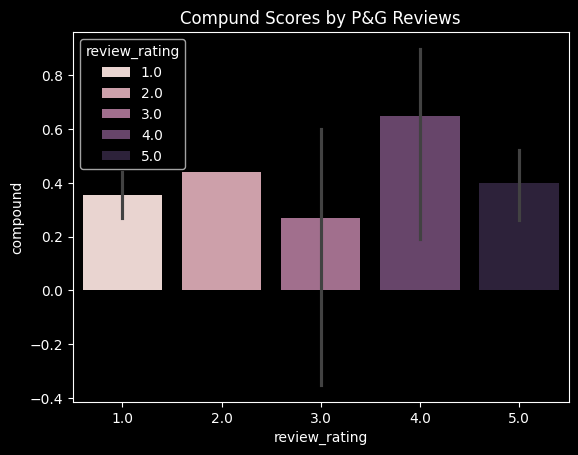

In [113]:
ax = sns.barplot(data=vaders, x='review_rating', y='compound', hue='review_rating')
ax.set_title('Compund Scores by P&G Reviews')
plt.show()

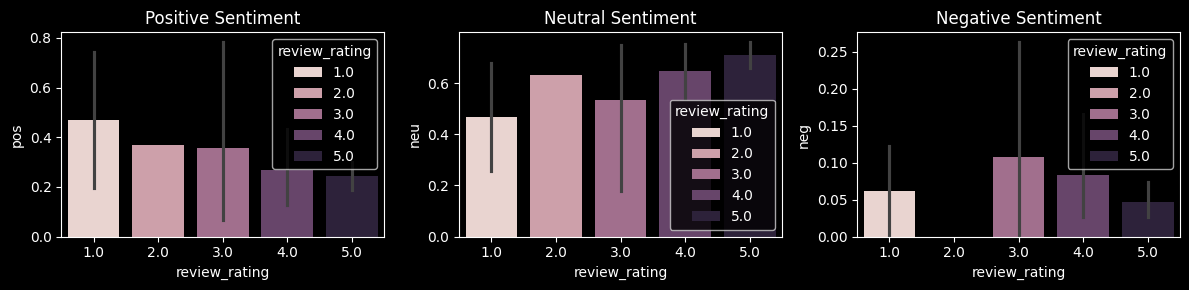

In [114]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

sns.barplot(data=vaders, x='review_rating', y='pos', ax=axs[0], hue='review_rating')
sns.barplot(data=vaders, x='review_rating', y='neu', ax=axs[1], hue='review_rating')
sns.barplot(data=vaders, x='review_rating', y='neg', ax=axs[2], hue='review_rating')
axs[0].set_title('Positive Sentiment')
axs[1].set_title('Neutral Sentiment')
axs[2].set_title('Negative Sentiment')
plt.tight_layout()
plt.show()

# Roberta Pre-trained model 

In [115]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [116]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [117]:
#VADER 
print(example)
sia.polarity_scores(example)

its hard to beat tide pods for convenience ive never had any problems with them like some people have reported i throw a pod into the bottom of the washer put clothes in and push start on the machine clothes and my laundry room smell great clothes are clean and im happy very convenient


{'neg': 0.022, 'neu': 0.734, 'pos': 0.244, 'compound': 0.9307}

In [118]:
#ROBERTA with transformer applying to example of our dataset
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores
# 3 different values in numpy array instead 
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
scores_dict

{'roberta_neg': np.float32(0.014538411),
 'roberta_neu': np.float32(0.059165753),
 'roberta_pos': np.float32(0.9262958)}

In [119]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores
    # 3 different values in numpy array instead 
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [120]:
res = {} 
for i, row in tqdm(df.iterrows(), total=len(df)): 
    try:
        text = row['review_text']
        vader_numeric = sia.polarity_scores(text)
        roberta_numeric = polarity_scores_roberta(text)
        vader_numeric_rename = {}
        num = i+1
        for key, value in vader_numeric.items():
            vader_numeric_rename[f"vader_{key}"] = value
        both = {**vader_numeric_rename, **roberta_numeric}
        res[num] = both
    except RuntimeError:
        print(f'broke for review {text}')
    if i == 250: 
        break

  0%|          | 0/1000 [00:00<?, ?it/s]

In [121]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'id'})
results_df = pd.concat([df, results_df], axis=1)

In [122]:
results_df.head()

,brand,review_title,review_text,review_rating,id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos
8059,Swiffer,Five Stars,does the job for me,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11226,Lenor,Left Clothes Soft.,my bottle didnt have an overpowering scent as ...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6563,Tide,I've never had any problems with them like som...,its hard to beat tide pods for convenience ive...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6180,Downy,fantastic fabric softener in a fold flat recyc...,talk about convenient these refills are great ...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5375,Bounce,Bounce review,my first reaction when i opened the box of sof...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
results_df.columns

Index(['brand', 'review_title', 'review_text', 'review_rating', 'id',
       'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound', 'roberta_neg',
       'roberta_neu', 'roberta_pos'],
      dtype='object')

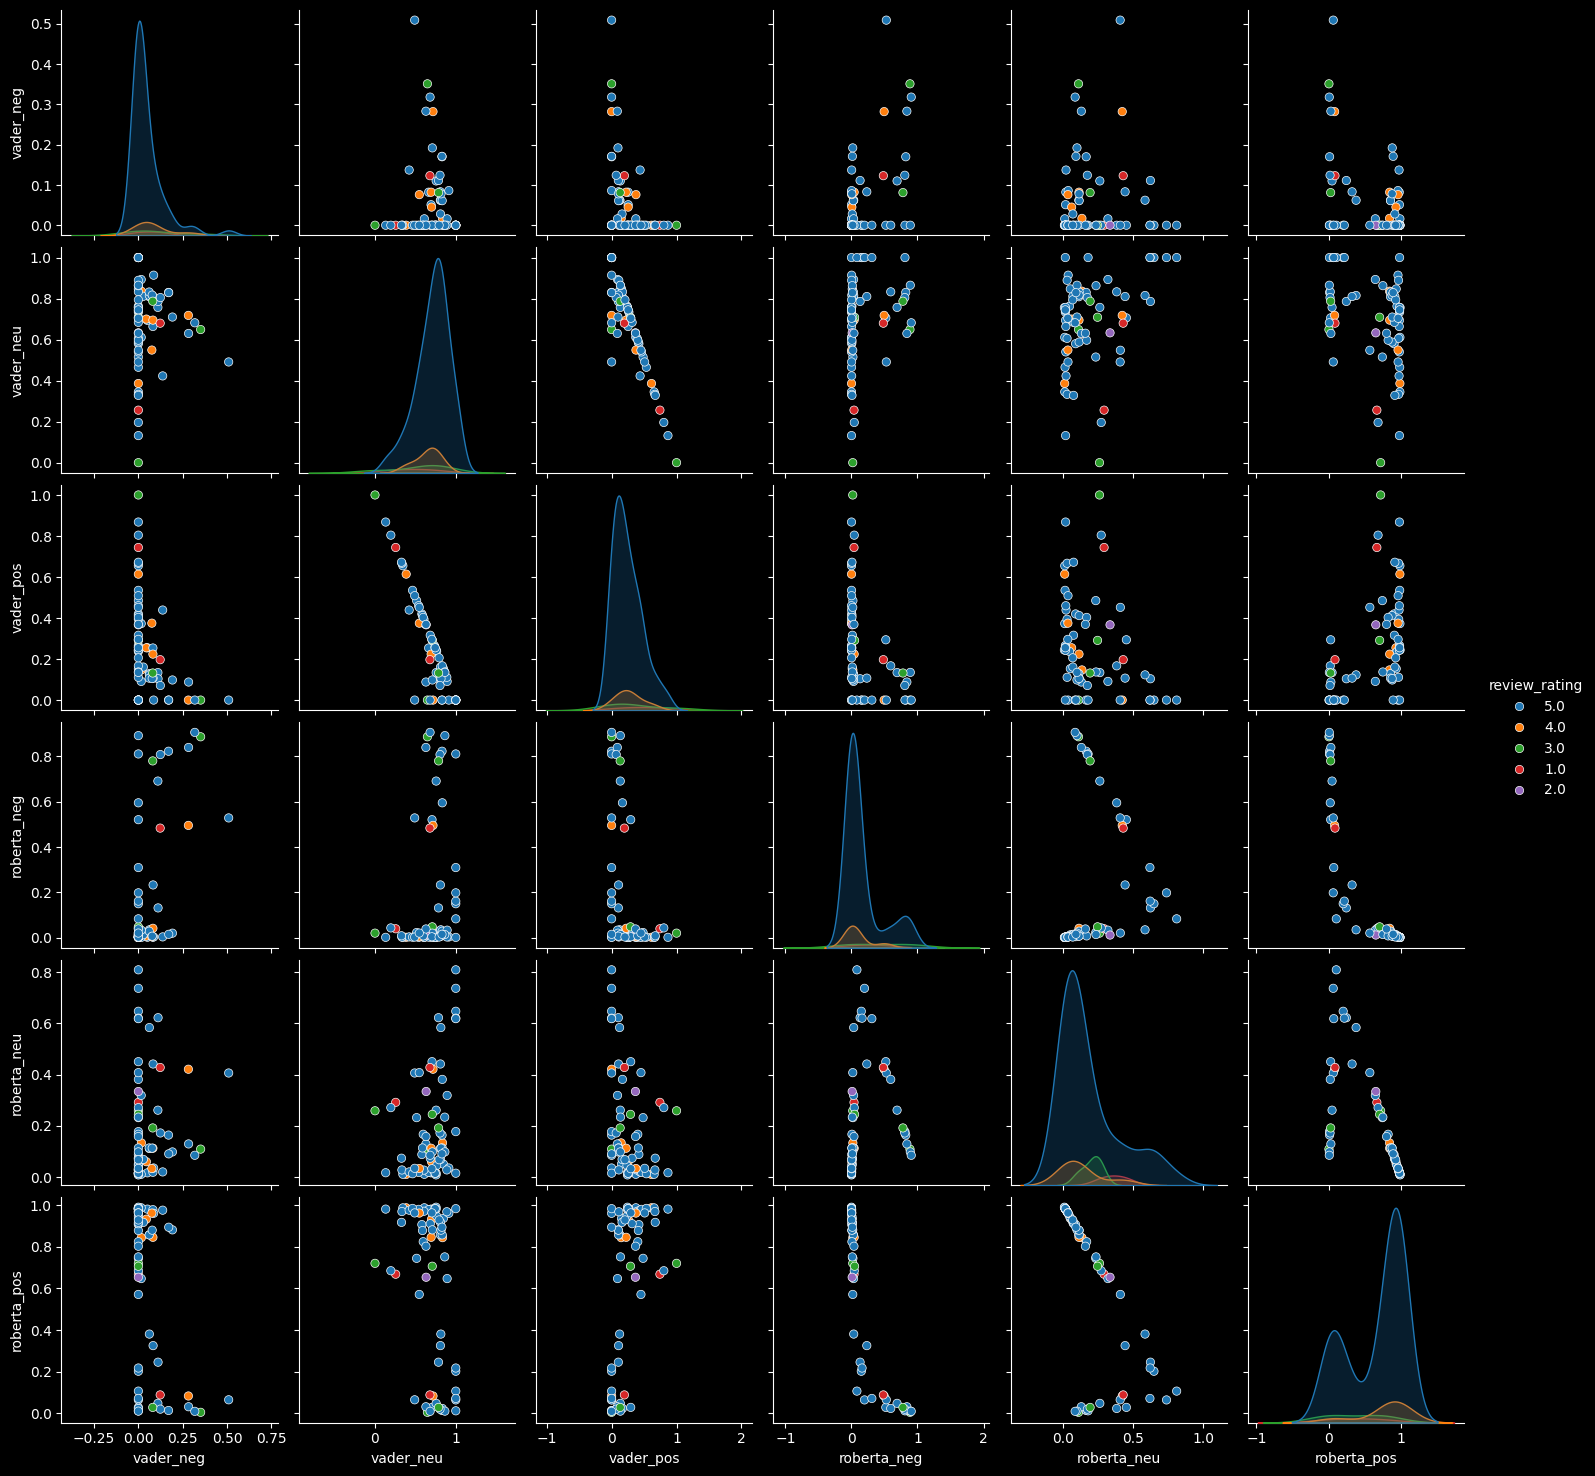

In [125]:
sns.pairplot(data=results_df, vars=['vader_neg', 'vader_neu', 'vader_pos', 'roberta_neg',
       'roberta_neu', 'roberta_pos'], hue='review_rating', palette='tab10')
plt.show()

# Review Examples (sentiment error)

In [126]:
results_df['review_rating'] = pd.to_numeric(results_df['review_rating'], errors='coerce')
results_df.query('review_rating == 1') \
    .sort_values('roberta_pos', ascending=False)['review_text'].values[1]

'product is good but it was damaged during shipping and some of the pods burst and theyre all now a melted sticky mess leaked all over the other items in the box one of which was baby food the container and the box itself where it looks like it must have been on its side at some point pics included'

In [127]:
results_df.query('review_rating == 1') \
    .sort_values('vader_pos', ascending=False)['review_text'].values[1]

'product is good but it was damaged during shipping and some of the pods burst and theyre all now a melted sticky mess leaked all over the other items in the box one of which was baby food the container and the box itself where it looks like it must have been on its side at some point pics included'

In [128]:
results_df.query('review_rating == 5') \
    .sort_values('roberta_neg', ascending=False)['review_text'].values[0]

'fresh clean long lasting scent'

In [129]:
results_df.query('review_rating == 5') \
    .sort_values('vader_neg', ascending=False)['review_text'].values[0]

'best product ever'

# Sentiement pipeline

In [130]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


In [131]:
sent_pipeline(example)

[{'label': 'POSITIVE', 'score': 0.9989884495735168}]

In [132]:
example

'its hard to beat tide pods for convenience ive never had any problems with them like some people have reported i throw a pod into the bottom of the washer put clothes in and push start on the machine clothes and my laundry room smell great clothes are clean and im happy very convenient'

In [133]:
sent_pipeline("if only I had something to magically make these tie-pods work. \
These work as good as magic. Good thing magic isn't real!")

[{'label': 'POSITIVE', 'score': 0.9970754384994507}]

In [134]:
sent_pipeline("I hate tie-pods for the life of me, I hate everything about them!")

[{'label': 'NEGATIVE', 'score': 0.9985942244529724}]

In [135]:
sent_pipeline("wow really huh")

[{'label': 'POSITIVE', 'score': 0.9990172386169434}]